## FIRST SEMINAR NOTEBOOK

Requirements

In [1]:
#%pip install ffmpeg-python
#%pip install PIL
#%pip install numpy
#%pip install Pillow
#%pip install io
#%pip install scipy
#%pip install pyWavelets

In [2]:
import PIL
from PIL import Image as Img
from IPython.display import Image
import ffmpeg
from ffmpeg import filter
import io
from io import BytesIO
import numpy as np
import scipy.fftpack
from scipy.fftpack import dct, idct
import pywt

**EXERCISE 2:** RGB to YUV and YUV to RGB functions

In [3]:
def rgb2yuv(color):
    r = color[0]
    g = color[1]
    b = color[2]

    Y = 0.257*r +0.504*g +0.098*b +16
    U = -0.148*r -0.291*g +0.439*b +128
    V = 0.439*r -0.368*g -0.071*b +128

    color_yuv = [Y, U, V]
    return color_yuv

def yuv2rgb(color):
    Y = color[0]
    U = color[1]
    V = color[2]

    r = 1.164*(Y-16)+1.596*(V-128)
    g = 1.164*(Y-16) - 0.813*(V-128)-0.391*(U-128)
    b = 1.164*(Y-16)+2.018*(U-128)

    color_rgb = [r, g, b]
    return color_rgb

In [4]:
color = [255, 255, 255]
color_yuv = rgb2yuv(color)
color_rgb = yuv2rgb(color_yuv)
print("Original color in RGB:", color)
print("Original color in YUV:", color_yuv)
print("Reconstructed color in RGB:", color_rgb)

Original color in RGB: [255, 255, 255]
Original color in YUV: [235.04500000000002, 128.0, 128.0]
Reconstructed color in RGB: [254.96838, 254.96838, 254.96838]


**EXERCISE 3:** Use ffmpeg to resize images into lower quality.

In [5]:
example_image = "images/ref.jpg"

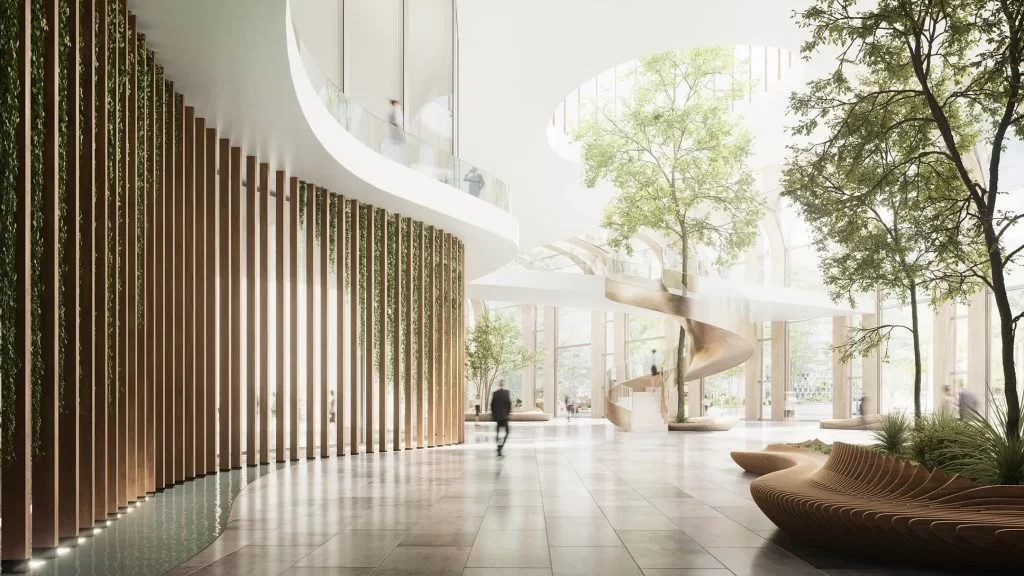

In [6]:
Img.open(example_image)

In [7]:
image = Img.open(example_image)

width, height = image.size

print(f"The image resolution is: {width}x{height}")

The image resolution is: 1024x576


In [8]:

# Input and output file paths
input_file = example_image
output_file = 'image_results/example_resized.jpg'
# Resize the image
try:
    ffmpeg.input(input_file).output(output_file, vf='scale=576:256').run(capture_stdout=True, capture_stderr=True, overwrite_output=True)
    print(f"Successfully resized {input_file} to 576x256")
except ffmpeg.Error as e:
    print(f"An error occurred: {e}")

Successfully resized images/ref.jpg to 576x256


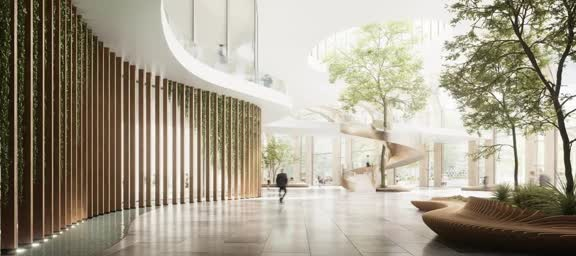

In [9]:
Image('image_results/example_resized.jpg')

In [10]:
## After having done every step separately, we add everything onto this function
def resize_image(input_file, output_file, width, height):

  image = Img.open(input_file)

  width_input, height_input = image.size
  print(f"The image resolution is: {width_input}x{height_input}")

  try:
    ffmpeg.input(input_file).output(output_file, vf=f"scale={width}:{height}").run(capture_stdout=True, capture_stderr=True, overwrite_output=True)
    Image(output_file)
    print(f"Successfully resized {input_file} to {width}x{height}")
  except ffmpeg.Error as e:
    print(f"An error occurred: {e}")

  return Image(output_file)

The image resolution is: 1024x576
Successfully resized images/ref.jpg to 320x240


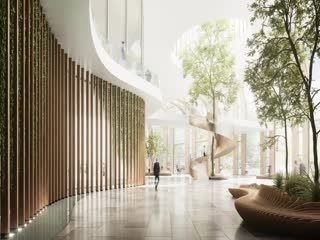

In [11]:
#Only one image can be shown per cell, so we chose to return the output image
resize_image(example_image, 'image_results/example_resized.jpg', 320, 240)

**Exercise 4:** Serpentine method function

This is the serpentine pattern

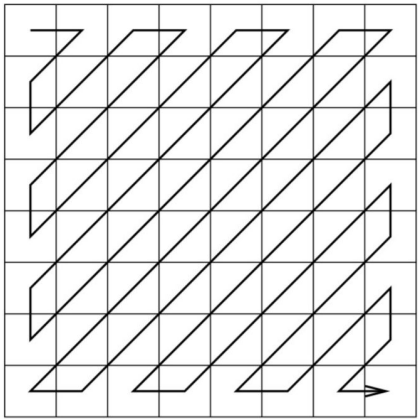

In [12]:
## First we have to define the 8x8 block of serpentine pattern that JPEG compression works with:
serpentine_order = [(0,0), (1,0), (0,1), (0,2), (1,1), (2,0), (3,0), (2,1), (1,2), (0,3), (0,4), (1,3), (2,2), (3,1), (4,0), (5,0), (4,1), (3,2), (2,3), (1,4), (0,5),
                    (0,6), (1,5), (2,4), (3,3), (4,2), (5,1), (6,0), (7,0), (6,1), (5,2), (4,3), (3,4), (2,5), (1,6), (0,7), (1,7), (2,6), (3,5), (4,4), (5,3), (6,2),
                    (7,1), (7,2), (6,3), (5,4), (4,5), (3,6), (2,7), (3,7), (4,6), (5,5), (6,4), (7,3), (7,4), (6,5), (5,6), (4,7), (5,7), (6,6), (7,5), (7,6), (6,7),
                    (7,7)]

len(serpentine_order) ## to make sure we wrote all pixels (8x8=64)

64

In [ ]:
def serpentine(input_file):

  image = Img.open(input_file).convert("RGB") ## convert part to get pixels in rgb value
  width, height = image.size

  pixels_im = image.load()

  pixels_read = []

  for w in range (0, width, 8):                ## start, stop, step
    for h in range (0, height, 8):

      for (x,y) in serpentine_order:           ## for each pixel (each pair of x,y coordinates)
        pixel_x = w + x                        ## the coordinate of the serpentine plus the block that it is in
        pixel_y = h + y
        if x <= width and y <= height:
          pixels_read.append(pixels_im[pixel_x, pixel_y])

  return pixels_read

In [14]:
ref_values = serpentine(example_image)

## To make sure that the # of pixels read is the same as the image
print("Number of pixels in image:", width*height)
print("Number of pixels read with serpentime pattern:", len(ref_values))

## Showing the first 10 pixels (if we print the whole sequence the cell crashes)
print(" \n10 first pixel values (in RGB) of the reference image:")
print(ref_values[0:10])

Number of pixels in image: 589824
Number of pixels read with serpentime pattern: 589824
 
10 first pixel values (in RGB) of the reference image:
[(49, 51, 30), (50, 52, 31), (37, 39, 18), (32, 34, 13), (38, 40, 19), (30, 32, 10), (35, 37, 15), (25, 27, 5), (34, 36, 15), (31, 33, 12)]


In [15]:
## Saving list of pixels into an image
  #create array with list, and reshape into width and height of image
array_serpentine = np.array(ref_values, dtype=np.uint8)
array_serpentine = array_serpentine.reshape(height, width, 3)

# create image with array
serpentine_image = Img.fromarray(array_serpentine)

# save image
serpentine_image.save("image_results/example_serpentine.jpg")

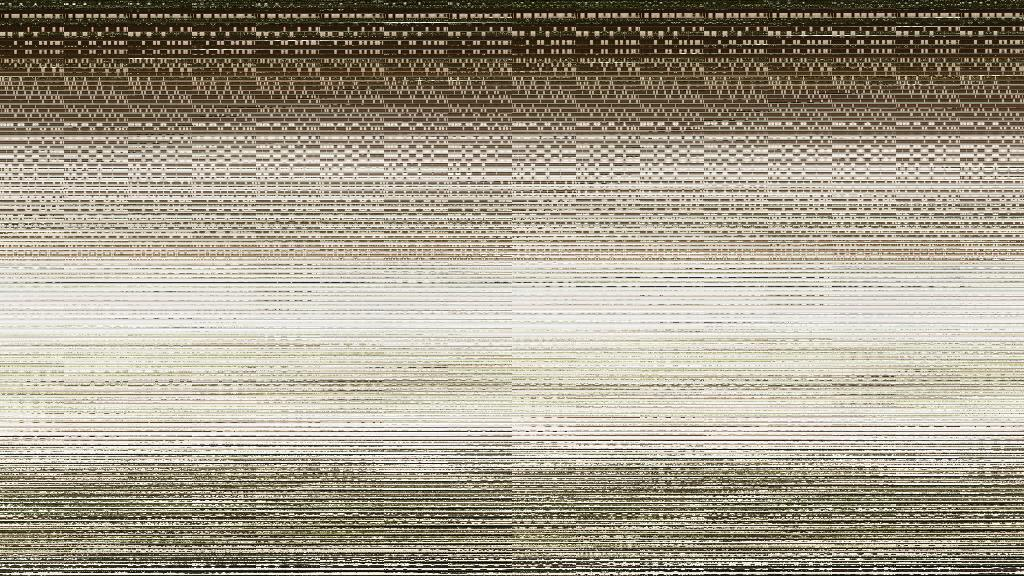

In [16]:
Image("image_results/example_serpentine.jpg")

In [49]:
# redefine serpentine function to add the creation of the image
def serpentine(input_file, output_file):

  image = Img.open(input_file).convert("RGB") ## convert part to get pixels in rgb value
  width, height = image.size

  pixels_im = image.load()

  pixels_read = []

  for w in range (0, width, 8):                ## start, stop, step
    for h in range (0, height, 8):
      
      for (x,y) in serpentine_order:           ## for each pixel (each pair of x,y coordinates)
        pixel_x = w + x                        ## the coordinate of the serpentine plus the block that it is in
        pixel_y = h + y                        
        if pixel_x < width and pixel_y < height:
          pixels_read.append(pixels_im[pixel_x, pixel_y])
        
  ## Saving list of pixels into an image
  #create array with list, and reshape into width and height of image
  array_serpentine = np.array(pixels_read, dtype=np.uint8)
  array_serpentine = array_serpentine.reshape(height, width, 3)

  # create image with array
  serpentine_image = Img.fromarray(array_serpentine)

  # save image
  serpentine_image.save(output_file)
  return output_file

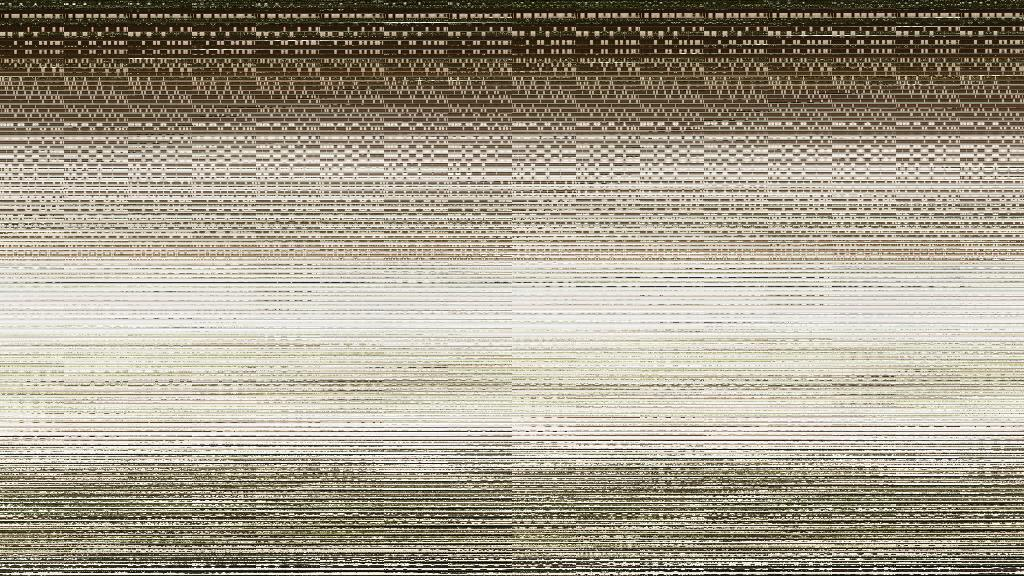

In [50]:
result_image = serpentine(example_image, 'image_results/example_serpentine.jpg')
Img.open(result_image)

**EXERCISE 5:** Use ffmpeg to transform image into B&W.

In [19]:
def grayscale_image(input_file, output_file):

  image = Img.open(input_file)

  try:
    ffmpeg.input(input_file).output(output_file, vf="format = gray").run(capture_stdout=True, capture_stderr=True, overwrite_output=True)
    print(f"Successfully converted into Black & White!")
  except ffmpeg.Error as e:
    print(f"An error occurred: {e}")

  return output_file

Successfully converted into Black & White!


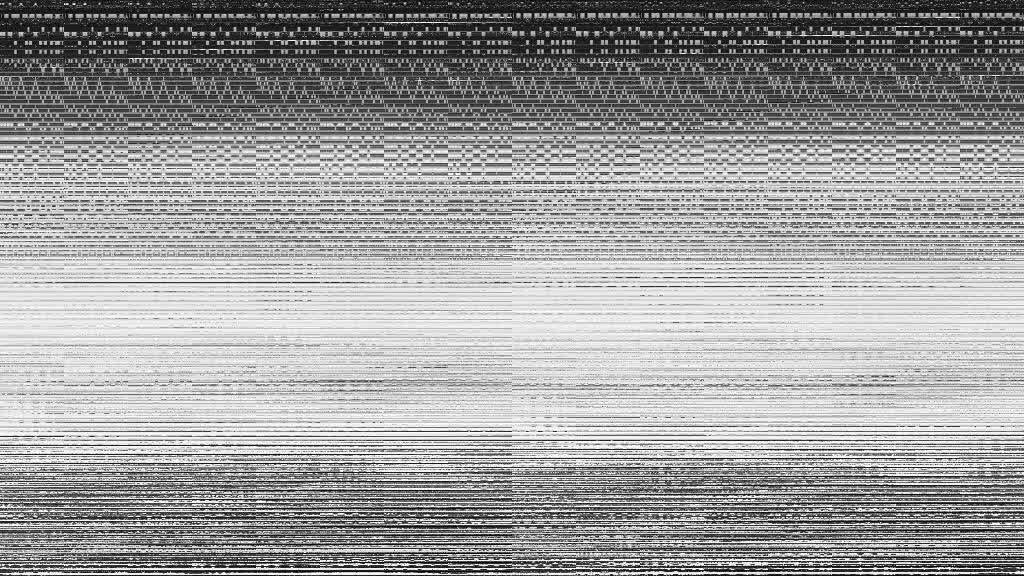

In [20]:
input_image = serpentine(example_image, 'image_results/example_serpentine.jpg')
output_bw = grayscale_image(input_image, 'image_results/example_bw_image.jpg')
Img.open(output_bw)

**EXERCISE 6:** Apply a run-lenght encoding from a series of bytes given.

In [21]:
def run_length_encoding(datastream):
  c = 0
  count = 0

  for x in range (len(datastream)):
    if datastream[c] == '0':
      count=count+1

      if datastream[c + 1] != '0':
        print("0"+ str(count), end='')
    else:
      print(datastream[c], end='')
    c = c+1

In [22]:
datastream = '45734712600000000623145'
run_length_encoding(datastream)

45734712608623145

**EXERCISE 7:** Use DCT to convert, decode (or both) an input.

In [23]:
def dct_conversion (input_file,serpentine_implemented, bw_implemented):
  if serpentine_implemented == False:
    serpentine_im = serpentine(input_file, "image_results/example_serpentine.jpg")
    input_file = serpentine_im

  if bw_implemented == False:
    grayscale_im = grayscale_image(input_file, 'image_results/example_bw_image.jpg')
    input_file = grayscale_im
  
  im = Img.open(input_file)
  result_im = np.asarray(im)
  dct_values = dct(result_im, type=2, n=None, axis=-1)

  return dct_values



In [24]:
dct_values_ref = dct_conversion(example_image, False, False)
print("DCT values from reference image:")
print(dct_values_ref)

Successfully converted into Black & White!
DCT values from reference image:
[[[ 234.    0.    0.]
  [ 288.    0.    0.]
  [ 300.    0.    0.]
  ...
  [ 228.    0.    0.]
  [ 318.    0.    0.]
  [ 318.    0.    0.]]

 [[  90.    0.    0.]
  [ 294.    0.    0.]
  [  60.    0.    0.]
  ...
  [ 114.    0.    0.]
  [ 360.    0.    0.]
  [ 198.    0.    0.]]

 [[ 180.    0.    0.]
  [ 168.    0.    0.]
  [ 174.    0.    0.]
  ...
  [  84.    0.    0.]
  [ 156.    0.    0.]
  [ 324.    0.    0.]]

 ...

 [[1506.    0.    0.]
  [1434.    0.    0.]
  [1404.    0.    0.]
  ...
  [1530.    0.    0.]
  [1530.    0.    0.]
  [1530.    0.    0.]]

 [[ 360.    0.    0.]
  [ 372.    0.    0.]
  [ 642.    0.    0.]
  ...
  [ 498.    0.    0.]
  [ 282.    0.    0.]
  [ 654.    0.    0.]]

 [[ 354.    0.    0.]
  [ 318.    0.    0.]
  [ 270.    0.    0.]
  ...
  [ 162.    0.    0.]
  [  66.    0.    0.]
  [  36.    0.    0.]]]


In [25]:
dct_values_ref2 = dct_conversion(output_bw, True, True)
print("DCT values from serpentine and b/w of reference image:")
print(dct_values_ref2)

DCT values from serpentine and b/w of reference image:
[[[ 234.    0.    0.]
  [ 288.    0.    0.]
  [ 300.    0.    0.]
  ...
  [ 228.    0.    0.]
  [ 318.    0.    0.]
  [ 318.    0.    0.]]

 [[  90.    0.    0.]
  [ 294.    0.    0.]
  [  60.    0.    0.]
  ...
  [ 114.    0.    0.]
  [ 360.    0.    0.]
  [ 198.    0.    0.]]

 [[ 180.    0.    0.]
  [ 168.    0.    0.]
  [ 174.    0.    0.]
  ...
  [  84.    0.    0.]
  [ 156.    0.    0.]
  [ 324.    0.    0.]]

 ...

 [[1506.    0.    0.]
  [1434.    0.    0.]
  [1404.    0.    0.]
  ...
  [1530.    0.    0.]
  [1530.    0.    0.]
  [1530.    0.    0.]]

 [[ 360.    0.    0.]
  [ 372.    0.    0.]
  [ 642.    0.    0.]
  ...
  [ 498.    0.    0.]
  [ 282.    0.    0.]
  [ 654.    0.    0.]]

 [[ 354.    0.    0.]
  [ 318.    0.    0.]
  [ 270.    0.    0.]
  ...
  [ 162.    0.    0.]
  [  66.    0.    0.]
  [  36.    0.    0.]]]


In [26]:
def idct_conversion (dct_values):
  idct_values = idct(dct_values, type=2, norm='ortho', axis=-1, overwrite_x=False)

  return idct_values

In [27]:
idct_values_ref = idct_conversion(dct_values_ref)
print("IDCT values from image:")
print(idct_values_ref)

IDCT values from image:
[[[135.09996299 135.09996299 135.09996299]
  [166.27687753 166.27687753 166.27687753]
  [173.20508076 173.20508076 173.20508076]
  ...
  [131.63586138 131.63586138 131.63586138]
  [183.5973856  183.5973856  183.5973856 ]
  [183.5973856  183.5973856  183.5973856 ]]

 [[ 51.96152423  51.96152423  51.96152423]
  [169.74097914 169.74097914 169.74097914]
  [ 34.64101615  34.64101615  34.64101615]
  ...
  [ 65.81793069  65.81793069  65.81793069]
  [207.84609691 207.84609691 207.84609691]
  [114.3153533  114.3153533  114.3153533 ]]

 [[103.92304845 103.92304845 103.92304845]
  [ 96.99484522  96.99484522  96.99484522]
  [100.45894684 100.45894684 100.45894684]
  ...
  [ 48.49742261  48.49742261  48.49742261]
  [ 90.06664199  90.06664199  90.06664199]
  [187.06148722 187.06148722 187.06148722]]

 ...

 [[869.4895054  869.4895054  869.4895054 ]
  [827.92028602 827.92028602 827.92028602]
  [810.59977794 810.59977794 810.59977794]
  ...
  [883.34591186 883.34591186 883.3459

**EXERCISE 8:** Use DWT to convert, decode (or both) an input.

In [28]:
def dwt_conversion (input_file, serpentine_implemented, bw_implemented):
  if serpentine_implemented == False:
    serpentine_im = serpentine(input_file, "image_results/example_serpentine.jpg")
    input_file = serpentine_im

  if bw_implemented == False:
    grayscale_im = grayscale_image(input_file, 'image_results/example_bw_image.jpg')
    input_file = grayscale_im

  im = Img.open(input_file)
  im_array = np.asarray(im)
  dwt_values = pywt.dwt2(im_array, 'haar')

  return dwt_values



In [29]:
dwt_values_ref = dwt_conversion(example_image, False, False)
print("DWT values from image:")
print(dwt_values_ref)

Successfully converted into Black & White!
DWT values from image:
(array([[[ 87.,  87.],
        [ 93.,  93.],
        [ 69.,  69.],
        ...,
        [ 84.,  84.],
        [129., 129.],
        [106., 106.]],

       [[ 64.,  64.],
        [ 22.,  22.],
        [ 61.,  61.],
        ...,
        [ 75.,  75.],
        [ 57.,  57.],
        [ 93.,  93.]],

       [[ 58.,  58.],
        [ 79.,  79.],
        [ 88.,  88.],
        ...,
        [ 65.,  65.],
        [ 74.,  74.],
        [ 80.,  80.]],

       ...,

       [[490., 490.],
        [489., 489.],
        [484., 484.],
        ...,
        [450., 450.],
        [470., 470.],
        [510., 510.]],

       [[122., 122.],
        [290., 290.],
        [339., 339.],
        ...,
        [126., 126.],
        [164., 164.],
        [156., 156.]],

       [[112., 112.],
        [ 97.,  97.],
        [ 93.,  93.],
        ...,
        [ 42.,  42.],
        [ 27.,  27.],
        [ 17.,  17.]]], shape=(576, 512, 2)), (array([[[ -9., 

In [30]:
def idwt_conversion (dwt_values):
  idwt_values = pywt.idwt2(dwt_values, 'haar')

  return idwt_values

In [31]:
idwt_values_ref = idwt_conversion(dwt_values_ref)
print("IDCT values from image:")
print(idwt_values_ref)

IDCT values from image:
[[[ 39.  39.  39.  39.]
  [ 48.  48.  48.  48.]
  [ 50.  50.  50.  50.]
  ...
  [ 38.  38.  38.  38.]
  [ 53.  53.  53.  53.]
  [ 53.  53.  53.  53.]]

 [[ 15.  15.  15.  15.]
  [ 49.  49.  49.  49.]
  [ 10.  10.  10.  10.]
  ...
  [ 19.  19.  19.  19.]
  [ 60.  60.  60.  60.]
  [ 33.  33.  33.  33.]]

 [[ 30.  30.  30.  30.]
  [ 28.  28.  28.  28.]
  [ 29.  29.  29.  29.]
  ...
  [ 14.  14.  14.  14.]
  [ 26.  26.  26.  26.]
  [ 54.  54.  54.  54.]]

 ...

 [[251. 251. 251. 251.]
  [239. 239. 239. 239.]
  [234. 234. 234. 234.]
  ...
  [255. 255. 255. 255.]
  [255. 255. 255. 255.]
  [255. 255. 255. 255.]]

 [[ 60.  60.  60.  60.]
  [ 62.  62.  62.  62.]
  [107. 107. 107. 107.]
  ...
  [ 83.  83.  83.  83.]
  [ 47.  47.  47.  47.]
  [109. 109. 109. 109.]]

 [[ 59.  59.  59.  59.]
  [ 53.  53.  53.  53.]
  [ 45.  45.  45.  45.]
  ...
  [ 27.  27.  27.  27.]
  [ 11.  11.  11.  11.]
  [  6.   6.   6.   6.]]]


**EXERCISE 9:** Creating tests with AI

Instead of AI, we have decided to upload several example images, which can be used for any of the classes that we have defined for this seminar.

In [52]:
test_image = "images/AP11.jpg"
#test_image = "images/mountains.jpg"
#test_image = "images/music_brain.jpg"
#test_image = "images/ocean.jpg"
#test_image = "images/rainy_city.jpg"
#test_image = "images/ref.jpg"
#test_image = "images/THG_katniss.jpg"
#test_image = "images/VH_madrid.jpg"

The image resolution is: 201x251


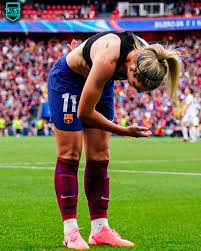

In [53]:
# Displaying image and resolution
im = Img.open(test_image)

width, height = im.size

print(f"The image resolution is: {width}x{height}")
Img.open(test_image)

The image resolution is: 201x251
Successfully resized images/AP11.jpg to 100x125


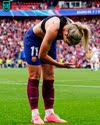

In [54]:
# RESIZING IMAGE
resize_image(test_image, 'image_results/test_image_resized.jpg', width//2, height//2)

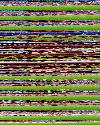

In [55]:
# Serpentine
serpentine_test_image = serpentine('image_results/test_image_resized.jpg', 'image_results/test_image_serpentine.jpg')
Img.open(serpentine_test_image)


Successfully converted into Black & White!


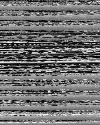

In [56]:
# RGB to B/W
grayscale_test_image = grayscale_image(serpentine_test_image, 'image_results/test_image_grayscale.jpg')
Img.open(grayscale_test_image)

In [57]:
#DCT and IDCT values
test_image_dct_values = dct_conversion(grayscale_test_image, True, True)
print("DCT values from test image:")
print(test_image_dct_values)

DCT values from test image:
[[[ 132.    0.    0.]
  [  78.    0.    0.]
  [ 138.    0.    0.]
  ...
  [ 594.    0.    0.]
  [ 822.    0.    0.]
  [ 612.    0.    0.]]

 [[ 600.    0.    0.]
  [ 822.    0.    0.]
  [ 678.    0.    0.]
  ...
  [1476.    0.    0.]
  [1044.    0.    0.]
  [1392.    0.    0.]]

 [[ 954.    0.    0.]
  [ 654.    0.    0.]
  [ 864.    0.    0.]
  ...
  [ 408.    0.    0.]
  [ 768.    0.    0.]
  [ 678.    0.    0.]]

 ...

 [[1314.    0.    0.]
  [1278.    0.    0.]
  [1332.    0.    0.]
  ...
  [ 930.    0.    0.]
  [ 882.    0.    0.]
  [ 942.    0.    0.]]

 [[ 954.    0.    0.]
  [ 966.    0.    0.]
  [1056.    0.    0.]
  ...
  [ 858.    0.    0.]
  [ 882.    0.    0.]
  [ 840.    0.    0.]]

 [[ 756.    0.    0.]
  [ 762.    0.    0.]
  [ 816.    0.    0.]
  ...
  [ 708.    0.    0.]
  [ 726.    0.    0.]
  [ 708.    0.    0.]]]


In [58]:
test_image_idct_values = idct_conversion(test_image_dct_values)
print("IDCT values from test image:")
print(test_image_idct_values)

IDCT values from test image:
[[[ 76.21023553  76.21023553  76.21023553]
  [ 45.033321    45.033321    45.033321  ]
  [ 79.67433715  79.67433715  79.67433715]
  ...
  [342.9460599  342.9460599  342.9460599 ]
  [474.58192127 474.58192127 474.58192127]
  [353.33836474 353.33836474 353.33836474]]

 [[346.41016151 346.41016151 346.41016151]
  [474.58192127 474.58192127 474.58192127]
  [391.44348251 391.44348251 391.44348251]
  ...
  [852.16899732 852.16899732 852.16899732]
  [602.75368103 602.75368103 602.75368103]
  [803.67157471 803.67157471 803.67157471]]

 [[550.79215681 550.79215681 550.79215681]
  [377.58707605 377.58707605 377.58707605]
  [498.83063258 498.83063258 498.83063258]
  ...
  [235.55890983 235.55890983 235.55890983]
  [443.40500674 443.40500674 443.40500674]
  [391.44348251 391.44348251 391.44348251]]

 ...

 [[758.63825372 758.63825372 758.63825372]
  [737.85364402 737.85364402 737.85364402]
  [769.03055856 769.03055856 769.03055856]
  ...
  [536.93575035 536.93575035 536

In [59]:
# DWT and IDWT values
test_image_dwt_values = dwt_conversion(grayscale_test_image, True, True)
print("DWT values from test image:")
print(test_image_dwt_values)

DWT values from test image:
(array([[[ 35.,  35.],
        [ 51.,  51.],
        [ 18.,  18.],
        ...,
        [161., 161.],
        [231., 231.],
        [239., 239.]],

       [[237., 237.],
        [242., 242.],
        [201., 201.],
        ...,
        [181., 181.],
        [406., 406.],
        [406., 406.]],

       [[268., 268.],
        [216., 216.],
        [283., 283.],
        ...,
        [345., 345.],
        [181., 181.],
        [241., 241.]],

       ...,

       [[432., 432.],
        [430., 430.],
        [378., 378.],
        ...,
        [335., 335.],
        [330., 330.],
        [304., 304.]],

       [[320., 320.],
        [342., 342.],
        [324., 324.],
        ...,
        [259., 259.],
        [276., 276.],
        [287., 287.]],

       [[253., 253.],
        [258., 258.],
        [256., 256.],
        ...,
        [237., 237.],
        [230., 230.],
        [239., 239.]]], shape=(125, 50, 2)), (array([[[  9.,   9.],
        [ -5.,  -5.],
        [ 

In [60]:
test_image_idwt_values = idwt_conversion(test_image_dwt_values)
print("IDWT values from test image:")
print(test_image_idwt_values)

IDWT values from test image:
[[[ 22.  22.  22.  22.]
  [ 13.  13.  13.  13.]
  [ 23.  23.  23.  23.]
  ...
  [ 99.  99.  99.  99.]
  [137. 137. 137. 137.]
  [102. 102. 102. 102.]]

 [[100. 100. 100. 100.]
  [137. 137. 137. 137.]
  [113. 113. 113. 113.]
  ...
  [246. 246. 246. 246.]
  [174. 174. 174. 174.]
  [232. 232. 232. 232.]]

 [[159. 159. 159. 159.]
  [109. 109. 109. 109.]
  [144. 144. 144. 144.]
  ...
  [ 68.  68.  68.  68.]
  [128. 128. 128. 128.]
  [113. 113. 113. 113.]]

 ...

 [[219. 219. 219. 219.]
  [213. 213. 213. 213.]
  [222. 222. 222. 222.]
  ...
  [155. 155. 155. 155.]
  [147. 147. 147. 147.]
  [157. 157. 157. 157.]]

 [[159. 159. 159. 159.]
  [161. 161. 161. 161.]
  [176. 176. 176. 176.]
  ...
  [143. 143. 143. 143.]
  [147. 147. 147. 147.]
  [140. 140. 140. 140.]]

 [[126. 126. 126. 126.]
  [127. 127. 127. 127.]
  [136. 136. 136. 136.]
  ...
  [118. 118. 118. 118.]
  [121. 121. 121. 121.]
  [118. 118. 118. 118.]]]


In [ ]:
# RGB to YUV
color1 = [0,0,0]
color2 = [10, 20, 255]
color3 = [200, 10, 100]
color4 = [135, 40, 29]
color5 = [53, 97, 41]
rgb_colors = [color1, color2, color3, color4, color5]

print("RGB TO YUV CONVERSION")
yuv_colors = []
for color in rgb_colors:
    yuv_color = rgb2yuv(color)
    for i in range(3):
        yuv_color[i] = round(yuv_color[i],2)
    
    yuv_colors.append(yuv_color)
    print ("RGB color:", color, "YUV color:", (yuv_color))

print("-----------------------------------------------------")

print("YUV TO RGB CONVERSION")
new_rgb_colors = []
for color in yuv_colors:
    rgb_color = yuv2rgb(color)
    for i in range(3):
        rgb_color[i] = round(rgb_color[i],0)

    new_rgb_colors.append(rgb_color)
    print ("YUV color:", color, "RGB color:", rgb_color)




RGB TO YUV CONVERSION
RGB color: [0, 0, 0] YUV color: [16.0, 128.0, 128.0]
RGB color: [10, 20, 255] YUV color: [53.64, 232.65, 106.93]
RGB color: [200, 10, 100] YUV color: [82.24, 139.39, 205.02]
RGB color: [135, 40, 29] YUV color: [73.7, 109.11, 170.49]
RGB color: [53, 97, 41] YUV color: [82.53, 109.93, 112.66]
-----------------------------------------------------
YUV TO RGB CONVERSION
YUV color: [16.0, 128.0, 128.0] RGB color: [0.0, 0.0, 0.0]
YUV color: [53.64, 232.65, 106.93] RGB color: [10.0, 20.0, 255.0]
YUV color: [82.24, 139.39, 205.02] RGB color: [200.0, 10.0, 100.0]
YUV color: [73.7, 109.11, 170.49] RGB color: [135.0, 40.0, 29.0]
YUV color: [82.53, 109.93, 112.66] RGB color: [53.0, 97.0, 41.0]


In [ ]:
# RLE
datastream1 = '1234567890000000000987654321'
datastream2 = '10000400003000002000001803580140001'
datastream3 = '1020030004000050000060000007000000080000000090000000001'
datastream4 = '897300015804375000000578459078390750000003'
datastream5 = '34560078900000098768950345345'

print("RUN-LENGTH ENCODING TESTS")
datastreams = [datastream1, datastream2, datastream3, datastream4, datastream5]
for i, stream in enumerate(datastreams):
    
    print("Original Data Stream", i+1)
    print(stream)
    print("Data Stream", i+1, "applying RLE:")
    run_length_encoding(stream)
    print("\n    ")


RUN-LENGTH ENCODING TESTS
Original Data Stream 1
1234567890000000000987654321
Data Stream 1 applying RLE:
123456789010987654321
    
Original Data Stream 2
10000400003000002000001803580140001
Data Stream 2 applying RLE:
1044083013201818019358020140231
    
Original Data Stream 3
1020030004000050000060000007000000080000000090000000001
Data Stream 3 applying RLE:
1012033064010501560217028803690451
    
Original Data Stream 4
897300015804375000000578459078390750000003
Data Stream 4 applying RLE:
8973031580443750105784590117839012750183
    
Original Data Stream 5
34560078900000098768950345345
Data Stream 5 applying RLE:
34560278908987689509345345
    


**References**

Resize the image with ffmpeg: https://medium.com/@aleksej.gudkov/ffmpeg-python-example-a-guide-to-using-ffmpeg-with-python-020cdb7733e7

Format, load, fromarray, save fucntions of the image:
https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.Image.format


Information about the serpentine pattern: https://www.dspguide.com/ch27/6.htm


From list to array: https://stackoverflow.com/questions/46923244/how-to-create-image-from-a-list-of-pixel-values-in-python3


Reshaping the array: https://www.w3schools.com/python/numpy/numpy_array_reshape.asp


Black & white ffmpeg: https://stackoverflow.com/questions/32384057/ffmpeg-black-and-white-conversion

Run-length encoding: https://medium.com/@dafasaptian2304/python-for-data-compression-a-beginners-guide-to-rle-run-length-encoding-2cfe0b763f38